In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import sys
import scipy.stats as stats
import numpy as np
import pickle

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
CO2 = pd.read_csv('./../co2_temp_data/deseasonal_co2_month.csv', index_col='Date')
CO2.head()

,CO2
Date,
1959.0411,315.27
1959.1260,315.34
1959.2027,315.41
1959.2877,315.48
1959.3699,315.55


In [3]:
filedir = './../Output/output_raw/output_all/JENA_s76_all/spatial.pik'
JENA_s76 = pickle.load(open(filedir, 'rb'))

In [4]:
CO2.loc[1976.0410:].index

Float64Index([1976.0410000000002,          1976.1257,          1976.2049,
                       1976.2896,          1976.3716,          1976.4563,
                       1976.5383, 1976.6229999999998,          1976.7077,
                       1976.7896,
              ...
                       2017.2027,          2017.2877,          2017.3699,
                       2017.4548,           2017.537,          2017.6219,
                       2017.7068,           2017.789,           2017.874,
                       2017.9562],
             dtype='float64', name='Date', length=504)

In [5]:
fluxes = pd.DataFrame({"Date": CO2.loc[1976.0410:].index, 
                     "CO2": CO2.loc[1976.0410:].CO2.values,
                     "land": JENA_s76.Earth_Land.values,
                     "ocean": JENA_s76.Earth_Ocean.values
                    }
                   )
fluxes.set_index("Date", inplace=True)
fluxes.head()

,CO2,land,ocean
Date,,,
1976.0410,330.14,0.297948,-0.223051
1976.1257,330.21,0.202695,-0.205602
1976.2049,330.27,0.336327,-0.206325
1976.2896,330.34,0.243702,-0.183559
1976.3716,330.41,-0.437604,-0.152305


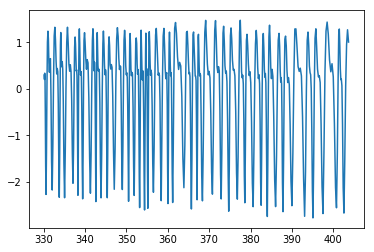

In [6]:
plt.plot(fluxes.CO2, fluxes.land)

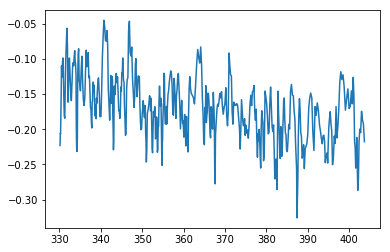

In [7]:
plt.plot(fluxes.CO2, fluxes.ocean)

In [8]:
land_reg = stats.linregress(fluxes.CO2, fluxes.land)
ocean_reg = stats.linregress(fluxes.CO2, fluxes.ocean)

In [9]:
y_land = land_reg[0]*fluxes.CO2 + land_reg[1]
y_ocean = ocean_reg[0]*fluxes.CO2 + ocean_reg[1]

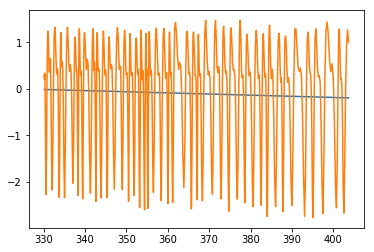

In [10]:
plt.plot(fluxes.CO2, y_land)
plt.plot(fluxes.CO2, fluxes.land)

In [11]:
(fluxes.land)/y_land

Date
1976.0410   -23.047874
1976.1257   -15.474373
1976.2049   -25.391452
1976.2896   -18.163598
1976.3716    32.204079
               ...    
2017.6219     8.108694
2017.7068    -0.358826
2017.7890    -4.968343
2017.8740    -6.591186
2017.9562    -5.205563
Length: 504, dtype: float64

In [12]:
t=range(0,len(fluxes)+0,12)
np.mean(fluxes.iloc[t].land)

0.5079805407288565

In [13]:
list_of_means_land = []
for i in range(12):
    indices = range(i,len(fluxes)+i,12)
    land_sub = fluxes.iloc[indices].land
    list_of_means_land.append(np.mean(land_sub))
list_of_means_land

[0.5079805407288565,
 0.30775465507593525,
 0.40016969158959753,
 0.28152665840473867,
 -0.478100150413757,
 -1.7739897487100964,
 -2.420970735194074,
 -1.4003912287541778,
 0.12616383510908752,
 1.076572801809027,
 1.2637853256532479,
 0.9840002016939967]

In [14]:
s_land = []
for i in range(42):
    for j in list_of_means_land:
        s_land.append(j)
s_land = np.array(s_land); s_land

array([ 0.50798054,  0.30775466,  0.40016969,  0.28152666, -0.47810015,
       -1.77398975, -2.42097074, -1.40039123,  0.12616384,  1.0765728 ,
        1.26378533,  0.9840002 ,  0.50798054,  0.30775466,  0.40016969,
        0.28152666, -0.47810015, -1.77398975, -2.42097074, -1.40039123,
        0.12616384,  1.0765728 ,  1.26378533,  0.9840002 ,  0.50798054,
        0.30775466,  0.40016969,  0.28152666, -0.47810015, -1.77398975,
       -2.42097074, -1.40039123,  0.12616384,  1.0765728 ,  1.26378533,
        0.9840002 ,  0.50798054,  0.30775466,  0.40016969,  0.28152666,
       -0.47810015, -1.77398975, -2.42097074, -1.40039123,  0.12616384,
        1.0765728 ,  1.26378533,  0.9840002 ,  0.50798054,  0.30775466,
        0.40016969,  0.28152666, -0.47810015, -1.77398975, -2.42097074,
       -1.40039123,  0.12616384,  1.0765728 ,  1.26378533,  0.9840002 ,
        0.50798054,  0.30775466,  0.40016969,  0.28152666, -0.47810015,
       -1.77398975, -2.42097074, -1.40039123,  0.12616384,  1.07

In [37]:
fluxes.land.size

504

In [15]:
whole_mean_land = np.mean(s_land); whole_mean_land

-0.09379151275063487

In [16]:
s_land-whole_mean_land

array([ 0.60177205,  0.40154617,  0.4939612 ,  0.37531817, -0.38430864,
       -1.68019824, -2.32717922, -1.30659972,  0.21995535,  1.17036431,
        1.35757684,  1.07779171,  0.60177205,  0.40154617,  0.4939612 ,
        0.37531817, -0.38430864, -1.68019824, -2.32717922, -1.30659972,
        0.21995535,  1.17036431,  1.35757684,  1.07779171,  0.60177205,
        0.40154617,  0.4939612 ,  0.37531817, -0.38430864, -1.68019824,
       -2.32717922, -1.30659972,  0.21995535,  1.17036431,  1.35757684,
        1.07779171,  0.60177205,  0.40154617,  0.4939612 ,  0.37531817,
       -0.38430864, -1.68019824, -2.32717922, -1.30659972,  0.21995535,
        1.17036431,  1.35757684,  1.07779171,  0.60177205,  0.40154617,
        0.4939612 ,  0.37531817, -0.38430864, -1.68019824, -2.32717922,
       -1.30659972,  0.21995535,  1.17036431,  1.35757684,  1.07779171,
        0.60177205,  0.40154617,  0.4939612 ,  0.37531817, -0.38430864,
       -1.68019824, -2.32717922, -1.30659972,  0.21995535,  1.17

In [17]:
d_land = fluxes.land.values - (s_land-whole_mean_land)
d_land

array([-3.03823988e-01, -1.98851111e-01, -1.57634357e-01, -1.31615845e-01,
       -5.32956870e-02,  3.03044671e-02,  6.26978062e-02, -6.25540768e-02,
       -1.09551715e-01, -1.71626197e-01, -1.19791997e-01, -6.42816277e-03,
       -4.08439295e-02, -4.49720608e-02,  8.93139050e-02,  2.73631570e-01,
        2.11018306e-01,  1.19978647e-01,  1.56923725e-01,  1.10719785e-01,
       -7.78077923e-02, -3.83896203e-02, -3.59475839e-02, -2.18302299e-02,
       -1.07144235e-02, -8.22991599e-02, -5.56388560e-02, -7.67600097e-03,
        6.96731937e-02,  4.35646980e-02,  1.18532023e-03, -8.47327775e-02,
       -1.58494778e-01, -2.28786024e-01, -1.48760086e-01, -6.20279123e-02,
       -4.71050744e-02,  7.09910205e-02,  8.68774336e-02,  4.22824976e-02,
        1.11849292e-01,  8.49209674e-02, -8.49886184e-03, -2.53278972e-02,
       -2.01069020e-01, -1.72220244e-01, -3.55402039e-02, -9.32361704e-02,
       -7.53722814e-02, -2.18227289e-02,  2.24752093e-02, -7.43756109e-03,
        1.33017935e-01,  

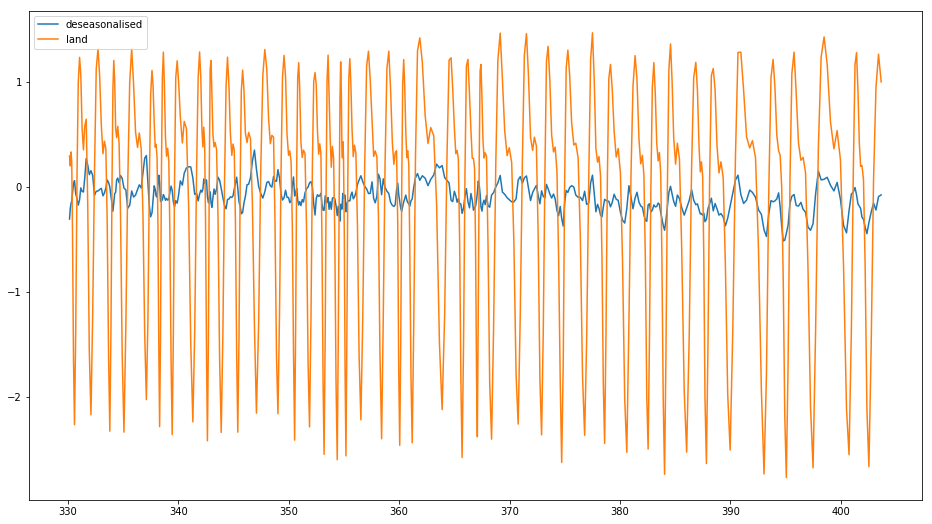

In [18]:
plt.figure(figsize=(16,9))
plt.plot(fluxes.CO2, d_land, label='deseasonalised')
plt.plot(fluxes.CO2, fluxes.land.values, label='land')
plt.legend()

# Rolling trend analysis

In [19]:
des = CO2.copy().loc[1976.0410:]
des["land"] = d_land
des.head()

,CO2,land
Date,,
1976.0410,330.14,-0.303824
1976.1257,330.21,-0.198851
1976.2049,330.27,-0.157634
1976.2896,330.34,-0.131616
1976.3716,330.41,-0.053296


In [20]:
def rolling_trend(data, sink='land', window=10, r_plot=False):
    
    data = data[['CO2', sink]]
    
    roll_values = []
    r_values = []
    
    for i in range(0,data.shape[0]-window):
        df = data.iloc[i:i+window+1]
        stats_info = stats.linregress(df['CO2'], df[sink])
        roll_values.append(stats_info[0])
        r_values.append(stats_info[2])
        
    data.plot(x='CO2', y=sink)
    plt.ylabel('C flux to the atmosphere (GtC)')
    
    roll_df = pd.DataFrame({f'{window}-month trend slope': roll_values}, index=data.index[:-window])
    roll_df.plot(color='g')
    plt.ylabel('Slope of C flux trend (GtC/ppm/yr)')
    
    if r_plot:
        r_df = pd.DataFrame({'r-values of trends': r_values}, index=data.index[:-window])
        r_df.plot(color='k')
        plt.ylabel('r-value of slope')
        return roll_df, r_df
    
    return roll_df

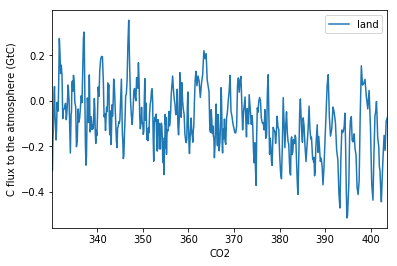

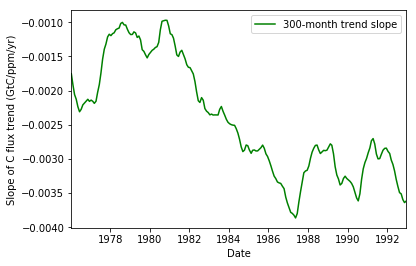

In [21]:
rolling_trend(des, window=25*12);

# 13-point smoothing

In [22]:
land_smooth = []
for i in range(fluxes.land.values[6:-6].size):
    subset = fluxes.land.values[i:i+13]
    mean = np.mean(subset)
    land_smooth.append(mean)

land_smooth = np.array(land_smooth)

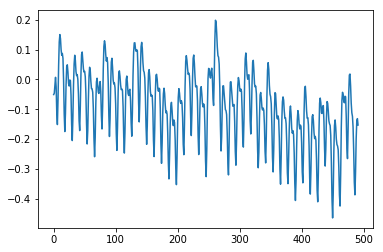

In [23]:
plt.plot(land_smooth)

In [24]:
smooth = CO2.copy().loc[1976.5383:2017.4548]
smooth["land"] = land_smooth
smooth.head()

,CO2,land
Date,,
1976.5383,330.59,-0.050865
1976.6230,330.70,-0.046355
1976.7077,330.82,-0.017080
1976.7896,330.93,0.006968
1976.8743,331.05,-0.025108


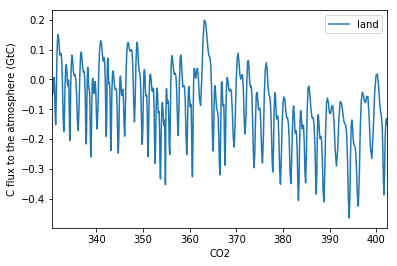

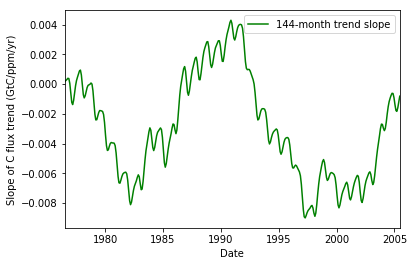

In [25]:
rolling_trend(smooth, window=12*12);

# Time series analysis

Autocorrelation

In [26]:
from pandas.plotting import lag_plot, autocorrelation_plot
from pandas import concat

In [27]:
des.head(10)

,CO2,land
Date,,
1976.0410,330.14,-0.303824
1976.1257,330.21,-0.198851
1976.2049,330.27,-0.157634
1976.2896,330.34,-0.131616
1976.3716,330.41,-0.053296
1976.4563,330.50,0.030304
1976.5383,330.59,0.062698
1976.6230,330.70,-0.062554
1976.7077,330.82,-0.109552


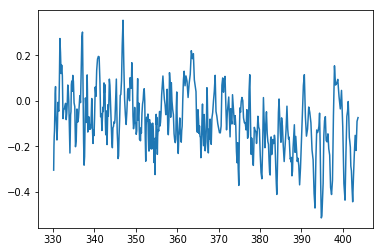

In [28]:
plt.plot(des["CO2"], des["land"])

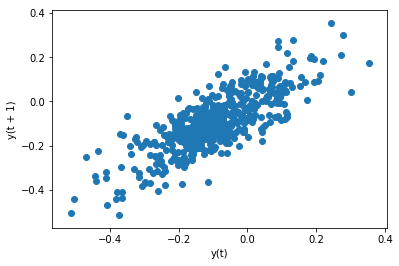

In [29]:
lag_plot(des["land"])

In [30]:
corr_df = concat([des["land"].shift(1), des["land"]], axis=1)
corr_df.columns = ['t-1', 't+1']
corr_df.corr()

,t-1,t+1
t-1,1.000000,0.793671
t+1,0.793671,1.000000


(0, 20)

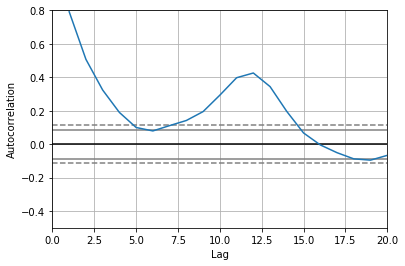

In [31]:
autocorrelation_plot(des["land"])
plt.ylim([-0.5, 0.8])
plt.xlim([0,20])